<h2> SVM - Support Vector Machine </h2>

In [30]:
# the limit of separation is created with the points of the border
# not only used in linear separated data
# the algorithm will find the best dimension (2d, 3d, nd...)

In [31]:
#importing the dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y= True, as_frame=True)

In [32]:
#considering 2 columns of petal and targets 0 and 1
X = X.loc[y.isin([0,1]), ['petal length (cm)','petal width (cm)']]
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
95,4.2,1.2
96,4.2,1.3
97,4.3,1.3
98,3.0,1.1


In [33]:
#considering 2 columns of petal and targets 0 and 1
y = y[y.isin([0,1])].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
#separating train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [35]:
# importing the classifier
from sklearn.svm import SVC

#creating the classifier
clf = SVC(kernel='linear').fit(X_train,y_train)

In [36]:
# visualizing coef
clf.coef_[0]

array([1.1769056 , 0.78337144])

In [56]:
#separating angular coef
a1 = clf.coef_[0][0]
a2 = clf.coef_[0][1]
print(a1,a2)

1.1769056049701345 0.7833714351967629


In [52]:
#getting linear coef
b0 = clf.intercept_[0]
print(b0)

-3.392548559820387


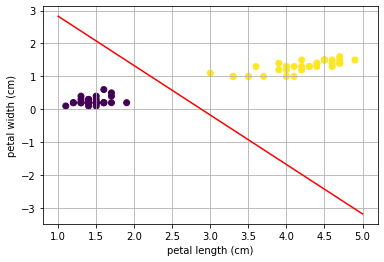

In [60]:
# plotting the train data
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(x=X_train.iloc[:,0], y=X_train.iloc[:,1], c=y_train)

#creating the separation
import numpy as np
x = np.linspace(1,5,100)
y = (-a1*x-b0) / a2
ax.plot(x,y,'r')

ax.grid()
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

plt.show()

In [63]:
# finding the support vectors
x_sup = clf.support_vectors_[:,0]
y_sup = clf.support_vectors_[:,1]
print(clf.support_vectors_, x_sup, y_sup)

[[1.9 0.2]
 [1.7 0.5]
 [3.  1.1]] [1.9 1.7 3. ] [0.2 0.5 1.1]


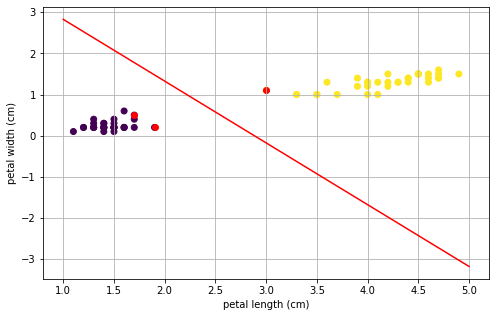

In [68]:
#plotting it
# plotting the train data
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,5))

ax.scatter(x=X_train.iloc[:,0], y=X_train.iloc[:,1], c=y_train)

#creating the separation
import numpy as np
x = np.linspace(1,5,100)
y = (-a1*x-b0) / a2
ax.plot(x,y,'r')

ax.grid()
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

#plotting support vectors
ax.scatter(x=x_sup, y=y_sup, c='r')

plt.show()

In [70]:
#checking with test data
y_pred = clf.predict(X_test)

In [71]:
#checking quality of result
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [83]:
x_wrong = X_test[y_test != y_pred]
x_wrong

,petal length (cm),petal width (cm)


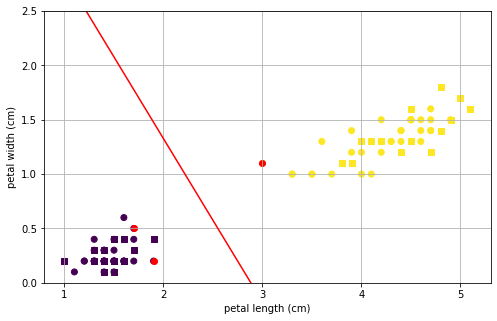

In [86]:
#plotting the test results
#plotting it
# plotting the train data
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,5))

ax.scatter(x=X_train.iloc[:,0], y=X_train.iloc[:,1], c=y_train)

ax.scatter(x=X_test.iloc[:,0], y=X_test.iloc[:,1], c=y_pred, marker='s')

#creating the separation
import numpy as np
x = np.linspace(1,5,100)
y = (-a1*x-b0) / a2
ax.plot(x,y,'r')

ax.grid()
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

#plotting support vectors
ax.scatter(x=x_sup, y=y_sup, c='r')

ax.set(ylim=(0,2.5))

plt.show()